In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
print(os.listdir("/kaggle/input"))


['stuednt2']


In [4]:
import pandas as pd
df = pd.read_csv("/kaggle/input/stuednt2/studentscores.csv")
print(df.info())
print("\nFirst 5 rows of data:")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [5]:
import pandas as pd
df = pd.read_csv("/kaggle/input/stuednt2/studentscores.csv")
print(df.info())
print("\nFirst 5 rows of data:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [6]:
print("Missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


In [19]:
print("Missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


In [21]:
df.fillna(df.select_dtypes(include="number").mean(), inplace=True)


In [24]:
for col in df.select_dtypes(include="object"):
    df[col] = df[col].fillna(df[col].mode()[0])

In [25]:
print("Updated dataset after handling missing values:")
print(df.head())
print("\nMissing values check:")
print(df.isnull().sum())


Updated dataset after handling missing values:
   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              

In [26]:
print("Summary Statistics:")
print(df.describe().T)


Summary Statistics:
                          count       mean         std   min     25%     50%  \
id                       2000.0  1000.5000  577.494589   1.0  500.75  1000.5   
absence_days             2000.0     3.6655    2.629271   0.0    2.00     3.0   
weekly_self_study_hours  2000.0    17.7555   12.129604   0.0    5.00    18.0   
math_score               2000.0    83.4520   13.224906  40.0   77.00    87.0   
history_score            2000.0    80.3320   12.736046  50.0   69.75    82.0   
physics_score            2000.0    81.3365   12.539453  50.0   71.00    83.0   
chemistry_score          2000.0    79.9950   12.777895  50.0   69.00    81.0   
biology_score            2000.0    79.5815   13.722190  30.0   69.00    81.0   
english_score            2000.0    81.2775   12.027087  50.0   72.00    83.0   
geography_score          2000.0    80.8880   11.637705  60.0   71.00    81.0   

                             75%     max  
id                       1500.25  2000.0  
absence_days 

In [27]:
print("\nAdditional Stats:")
print(df.select_dtypes(include="number").agg(["mean", "median", "std", "skew", "kurt"]))



Additional Stats:
                 id  absence_days  weekly_self_study_hours  math_score  \
mean    1000.500000      3.665500                17.755500   83.452000   
median  1000.500000      3.000000                18.000000   87.000000   
std      577.494589      2.629271                12.129604   13.224906   
skew       0.000000      0.767021                 0.138065   -1.090145   
kurt      -1.200000     -0.191770                -1.070141    0.800398   

        history_score  physics_score  chemistry_score  biology_score  \
mean        80.332000      81.336500        79.995000      79.581500   
median      82.000000      83.000000        81.000000      81.000000   
std         12.736046      12.539453        12.777895      13.722190   
skew        -0.269966      -0.346301        -0.201933      -0.529917   
kurt        -0.993471      -0.921761        -1.095792      -0.051999   

        english_score  geography_score  
mean        81.277500        80.888000  
median      83.000000

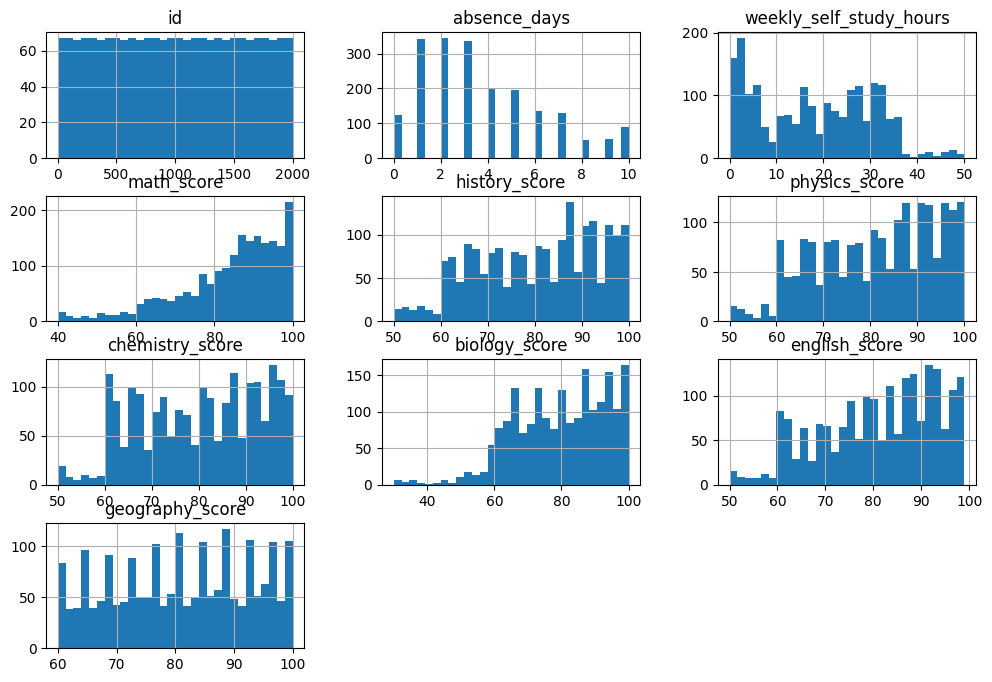

In [28]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 8), bins=30)
plt.show()


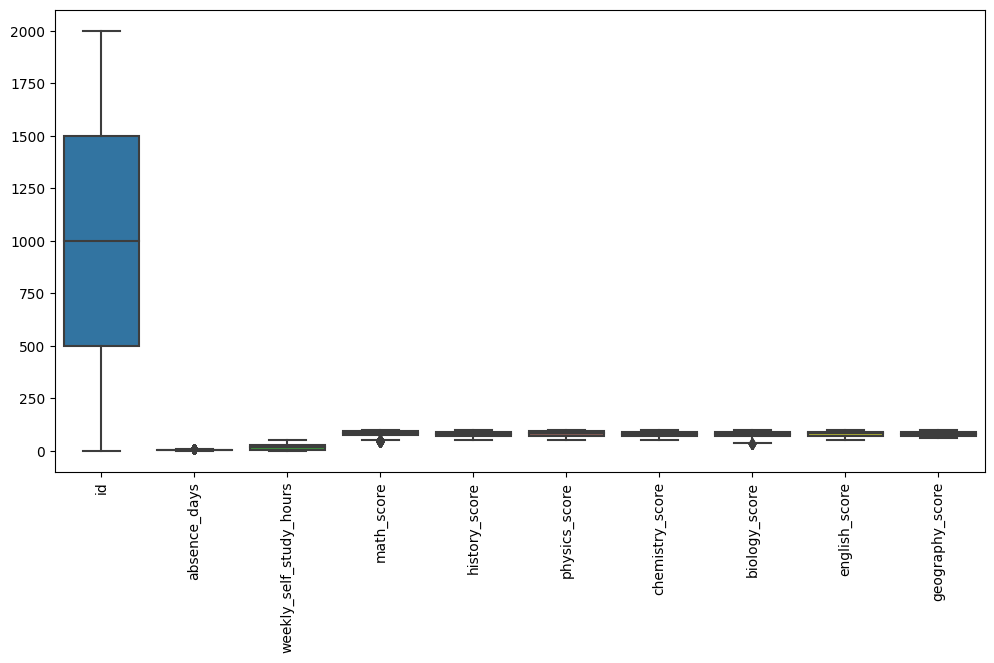

In [29]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.xticks(rotation=90)
plt.show()


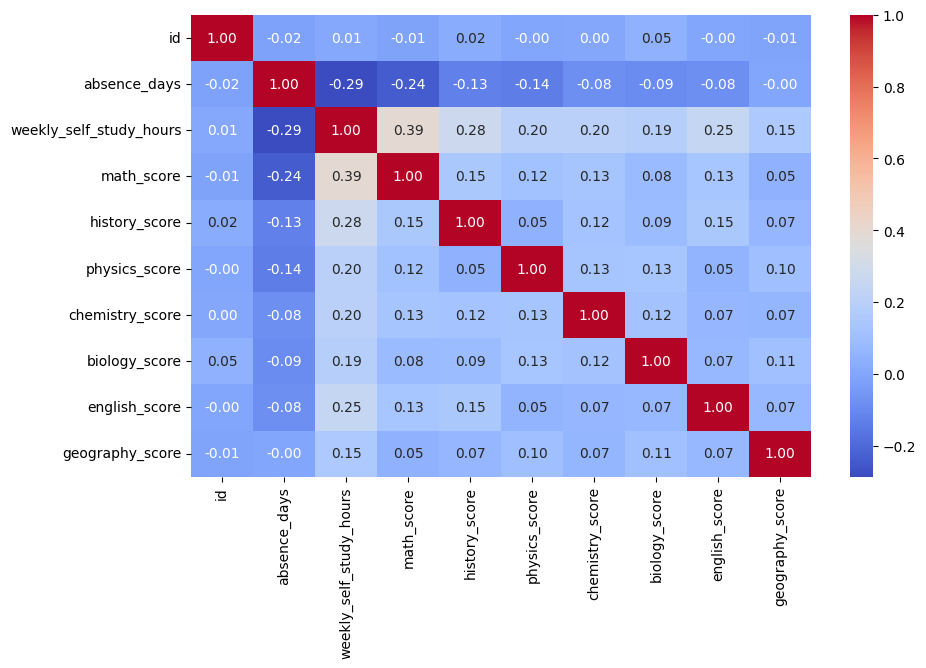

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include="number")
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [33]:
print(df.select_dtypes(include="object").columns)


Index(['first_name', 'last_name', 'email', 'gender', 'career_aspiration'], dtype='object')


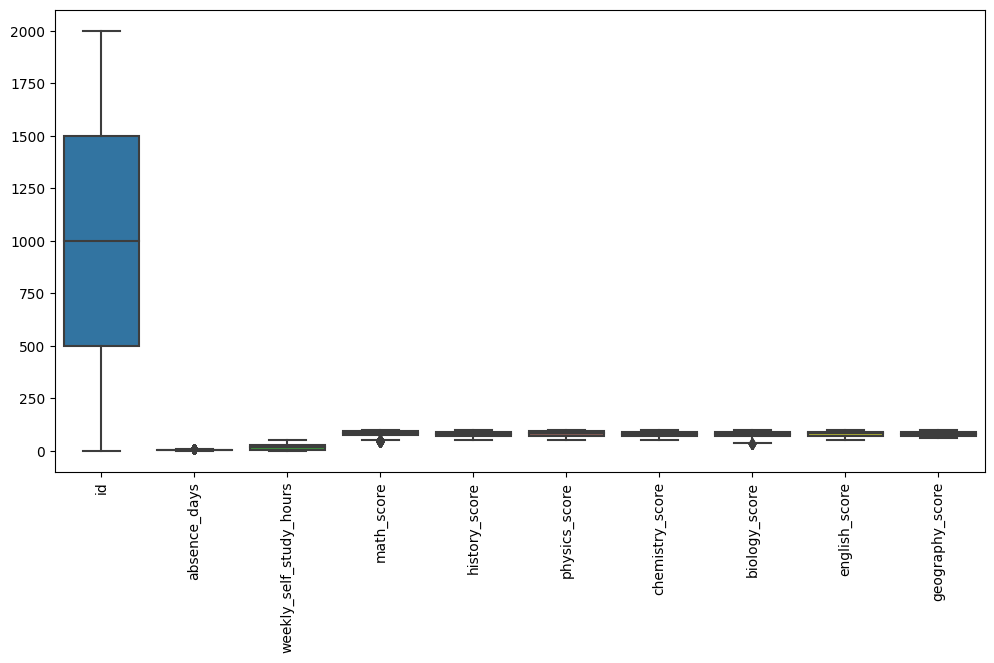

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.xticks(rotation=90)
plt.show()


In [36]:
numeric_df = df.select_dtypes(include="number")
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("Potential outliers per feature:\n", outliers)


Potential outliers per feature:
 id                          0
absence_days               88
weekly_self_study_hours     0
math_score                 70
history_score               0
physics_score               0
chemistry_score             0
biology_score              13
english_score               0
geography_score             0
dtype: int64


In [38]:
print("Available columns:\n", df.columns)


Available columns:
 Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')


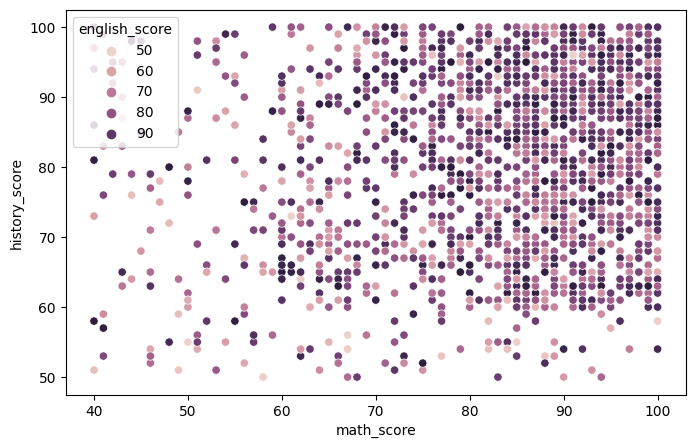

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["math_score"], y=df["history_score"], hue=df["english_score"])
plt.show()


In [40]:
print("Dataset Overview:")
print(df.describe().T)
print("\nFeature Correlations:")
print(df.select_dtypes(include="number").corr())


Dataset Overview:
                          count       mean         std   min     25%     50%  \
id                       2000.0  1000.5000  577.494589   1.0  500.75  1000.5   
absence_days             2000.0     3.6655    2.629271   0.0    2.00     3.0   
weekly_self_study_hours  2000.0    17.7555   12.129604   0.0    5.00    18.0   
math_score               2000.0    83.4520   13.224906  40.0   77.00    87.0   
history_score            2000.0    80.3320   12.736046  50.0   69.75    82.0   
physics_score            2000.0    81.3365   12.539453  50.0   71.00    83.0   
chemistry_score          2000.0    79.9950   12.777895  50.0   69.00    81.0   
biology_score            2000.0    79.5815   13.722190  30.0   69.00    81.0   
english_score            2000.0    81.2775   12.027087  50.0   72.00    83.0   
geography_score          2000.0    80.8880   11.637705  60.0   71.00    81.0   

                             75%     max  
id                       1500.25  2000.0  
absence_days   